# G2M insight for Cab Investment firm

## G2M Case Study 

## Project detail:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

## Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

* Review the Source Documentation
* Understand the field names and data types
* Identify relationships across the files
* Field/feature transformations
* Determine which files should be joined versus which ones should be appended
* Create master data and explain the relationship
* Identify and remove duplicates
* Perform other analysis like NA value and outlier detection

## import required Library

In [4]:
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Read the Dataset

In [5]:
Cab_Data = pd.read_csv('Dataset/Cab_Data.csv')
Customer_ID =  pd.read_csv("Dataset/Customer_ID.csv")
Transaction_ID = pd.read_csv("Dataset/Transaction_ID.csv")
City = pd.read_csv("Dataset/City.csv")

In [6]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
Cab_Data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [8]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
Transaction_ID.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [10]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [11]:
Customer_ID.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [12]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [13]:
# Check the shape of whole dataset
print("shape of Cab_Data", Cab_Data.shape)
print("shape of Customer_ID", Customer_ID.shape)
print("shape of Transaction_ID", Transaction_ID.shape)
print("shape of City Data", City.shape)

shape of Cab_Data (359392, 7)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


In [14]:
# check the basic information 
print(Cab_Data.info())
print(Customer_ID.info())
print(Transaction_ID.info())
print(City.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

## Data Cleaning & Visualization

In [15]:
for col in Cab_Data.columns:
    if ' ' in col:
        Cab_Data = Cab_Data.rename(columns={col:col.replace(' ','_')})

In [16]:
Cab_Data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [17]:
for col in Transaction_ID.columns:
    if ' ' in col:
        Transaction_ID = Transaction_ID.rename(columns={col:col.replace(' ','_')})

In [18]:
Transaction_ID.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [19]:
for col in Customer_ID.columns:
    if ' ' in col:
        Customer_ID = Customer_ID.rename(columns={col:col.replace(' ','_')})

In [20]:
Customer_ID.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

In [21]:
Cab_Data.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [22]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [23]:
Cab_Data['Date_of_Travel'] = Cab_Data['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [24]:
Cab_Data.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854


#### Adding month , year columns and deleting the column Date of Travel 

In [25]:
months=[]
years =[]
for i in range(len(Cab_Data['Date_of_Travel'])):
    months.append(Cab_Data['Date_of_Travel'][i].month)
    years.append(Cab_Data['Date_of_Travel'][i].year)
Cab_Data['Month'] = months
Cab_Data['Year'] = years

Cab_Data.drop('Date_of_Travel', axis=1, inplace=True)

#### checking if we have missing values

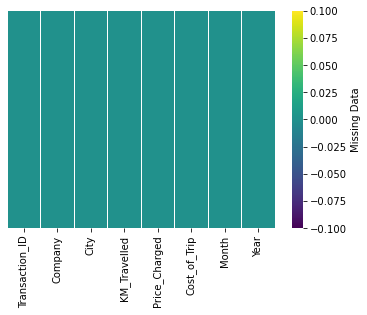

In [26]:
miss_cab_data = Cab_Data.isnull()
sns.heatmap(miss_cab_data, yticklabels=False,  cbar_kws={'label': 'Missing Data'}, cmap="viridis")
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)
#sns.heatmap(hawks.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})
#print(Cab_Data.isnull().sum())

#### 2éme méthode

<Figure size 720x432 with 0 Axes>

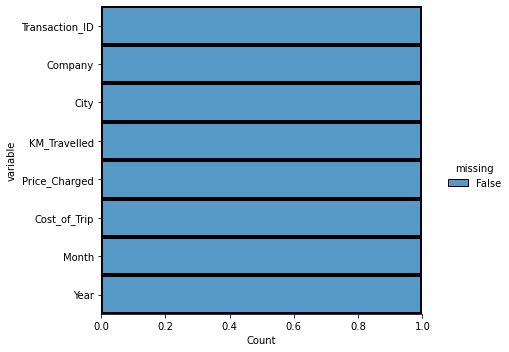

In [27]:
plt.figure(figsize=(10,6))
sns.displot(
    data=Cab_Data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

#### Removing duplicates 

In [16]:
Cab_Data = Cab_Data.drop_duplicates(keep="first")

In [28]:
# before doing EDA, let's split the dataset into Pink Cab and Yellow Cab
#This will be used later
PinkCab = Cab_Data[Cab_Data['Company']=='Pink Cab']
YellowCab = Cab_Data[Cab_Data['Company']=='Yellow Cab']

In [53]:
Cab_Data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [54]:
plot0 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot0

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

**Monthly Transaction Analysis**

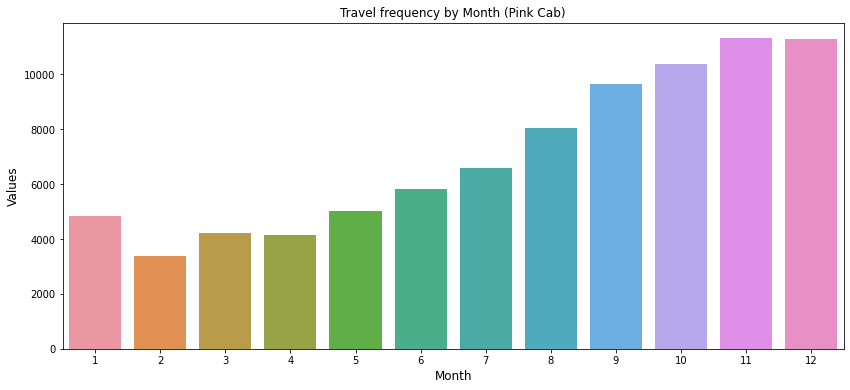

In [55]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

In [57]:
plot1 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot1

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

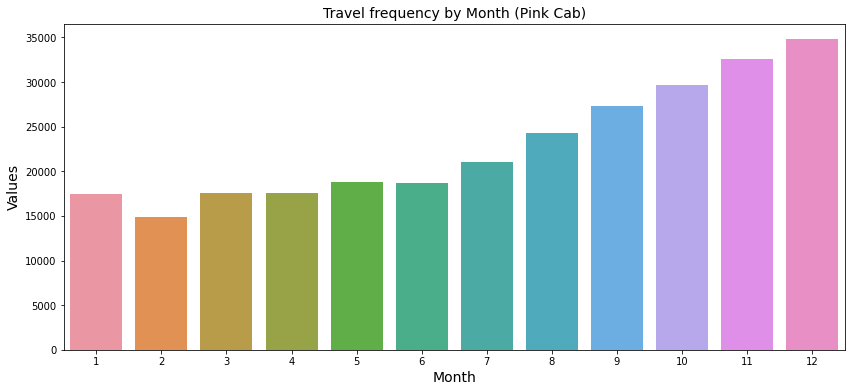

In [59]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Values',fontsize = 14)
plt.show()

### Yellow Cab has higher travels (35000) in the month of December which is the holiday season compared to Pink Cab (11000).

In [35]:
overall_distance = Cab_Data['KM_Travelled'].describe()
PinkCab_distance = PinkCab['KM_Travelled'].describe()
YellowCab_distance = YellowCab['KM_Travelled'].describe()


In [62]:
df = pd.DataFrame({'Overall': overall_distance.values,
                  'PinkCab': PinkCab_distance.values,
                  'YellowCab': YellowCab_distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df

,Overall,PinkCab,YellowCab
Count,359392.000000,84711.000000,274681.000000
Mean,22.567254,22.559917,22.569517
Std. Dev.,12.233526,12.231092,12.234298
Min,1.900000,1.900000,1.900000
25%,12.000000,12.000000,11.990000
50%,22.440000,22.440000,22.440000
75%,32.960000,32.960000,32.960000
Max,48.000000,48.000000,48.000000


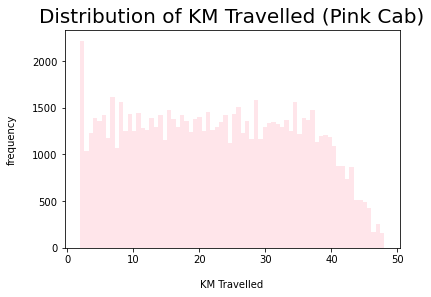

In [85]:
ax = sns.distplot(PinkCab['KM_Travelled'], kde=False, color='pink', bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

Text(0, 0.5, 'frequency')

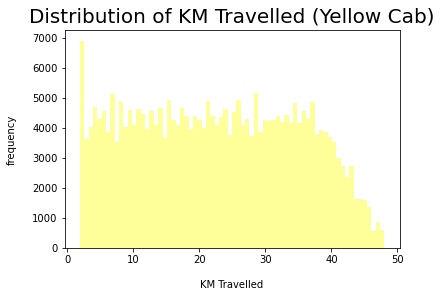

In [86]:
ax = sns.distplot(YellowCab['KM_Travelled'], kde=False, color='yellow',bins=70)
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)

### From the above graphs, we can see that the higher frequency is for those less than 10 km and most of the rides are in the range of approximately 2 to 48 KM.

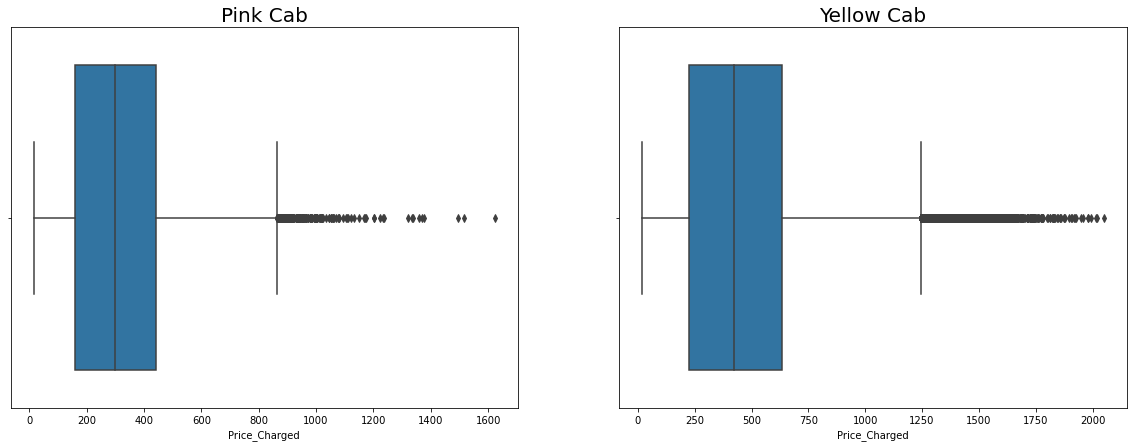

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sns.boxplot(YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

**Outliers**

>These outliers are due to use of high-end cars so decided to keep it.

>The price charge range for Yellow cab is more than the Pink cab.


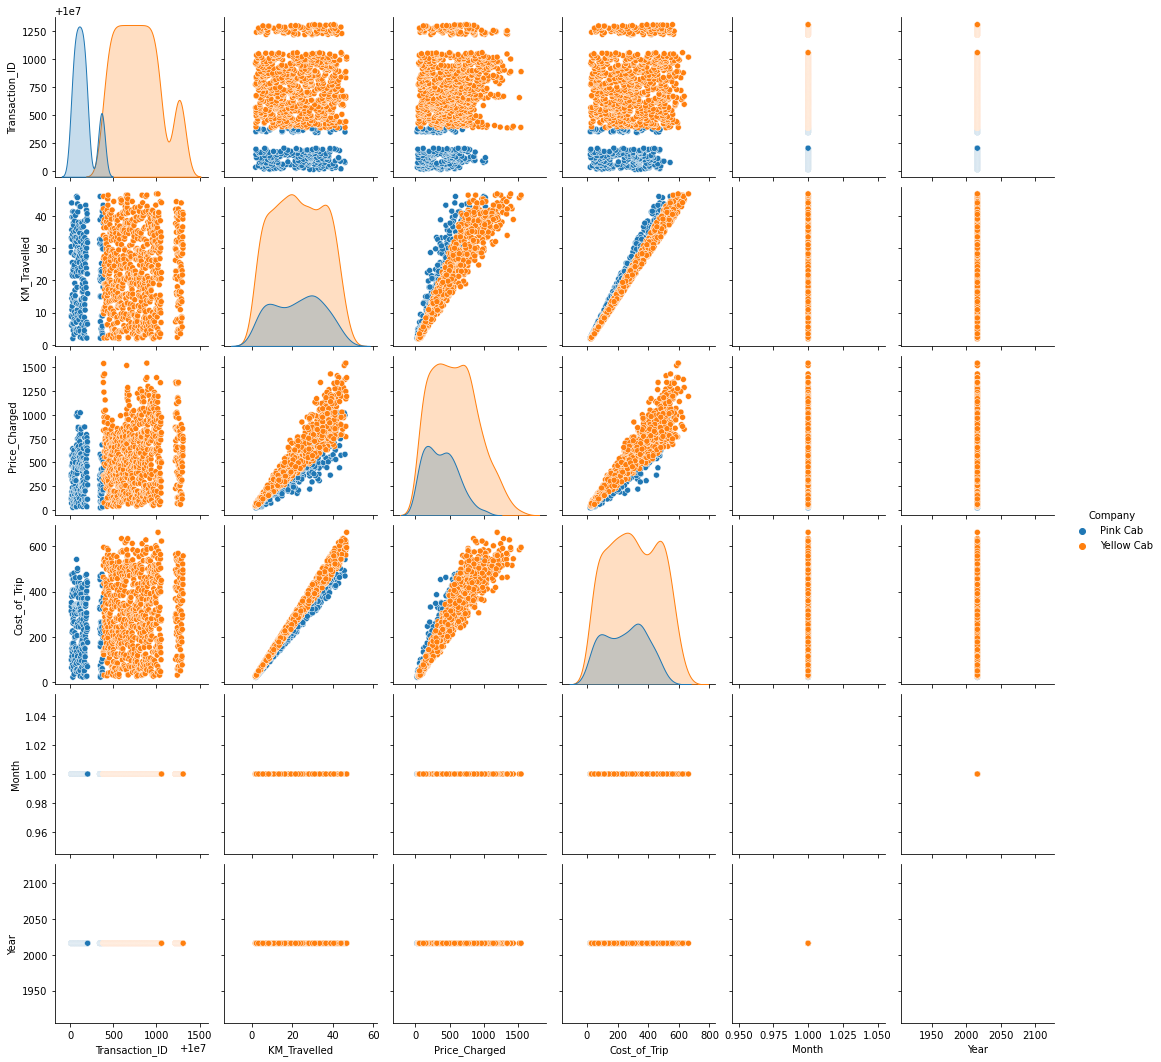

In [88]:
sns.pairplot(Cab_Data.head(1000), hue = 'Company')

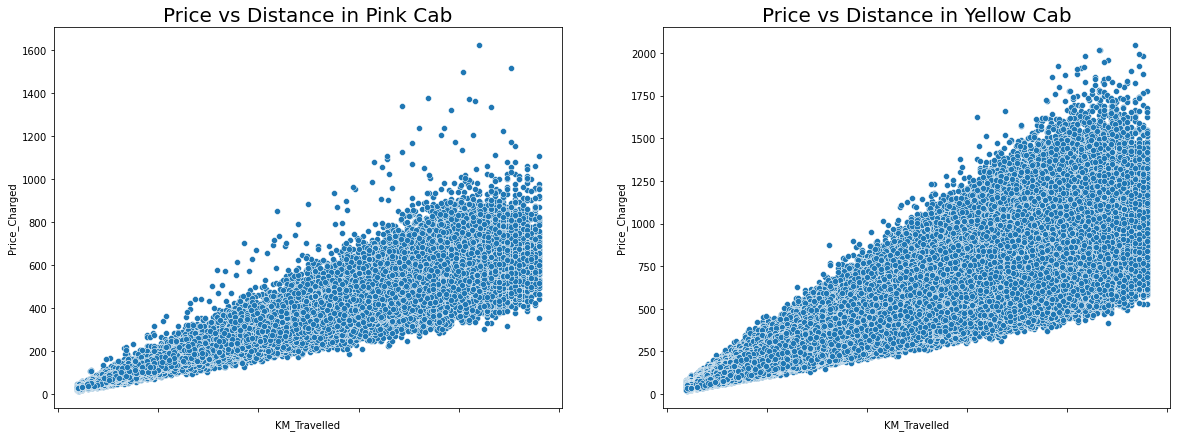

In [69]:
#Two Columns , Price vs Distance
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(PinkCab['KM_Travelled'], PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(YellowCab['KM_Travelled'], YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)
plt.show()

In [70]:
PinkCab['KM_Travelled'].corr(PinkCab['Price_Charged'])

0.9277652782594862

In [71]:
YellowCab['KM_Travelled'].corr(YellowCab['Price_Charged'])

0.8597086294478473

>* Distance is one of the important factors, which drives the price of the rides. 
>* We could see that there is a positive correlation in the graph for both Pink and Yellow cab.
>* The price for Yellow cab is higher compared to Pink cab.

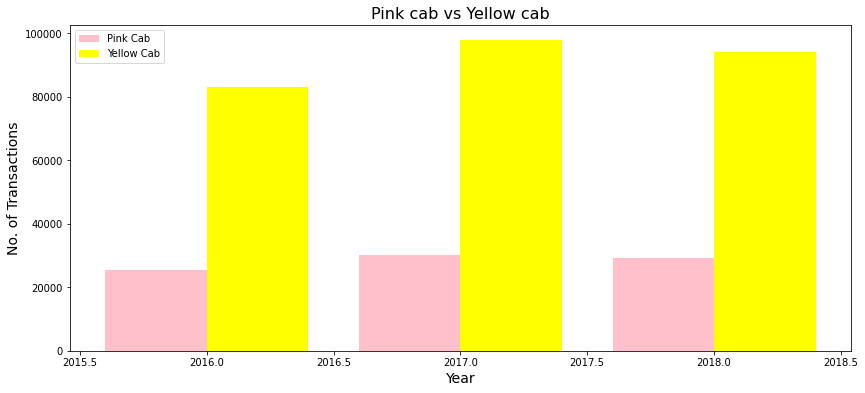

In [73]:
plot1 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot2 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

> **From the graph it shows that on yearly basis no. of transactions for Yellow cab is higher than Pink cab.**

**Pink cab**

In [75]:
Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()

Year
2016    315.850071
2017    315.535059
2018    301.538134
Name: Price_Charged, dtype: float64

In [76]:
Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    247.039209
2017    248.820917
2018    248.413839
Name: Cost_of_Trip, dtype: float64

##### Mean of Cost_of_Trip  of the three years is always higher for the pinkCap comparing to The yellow one 

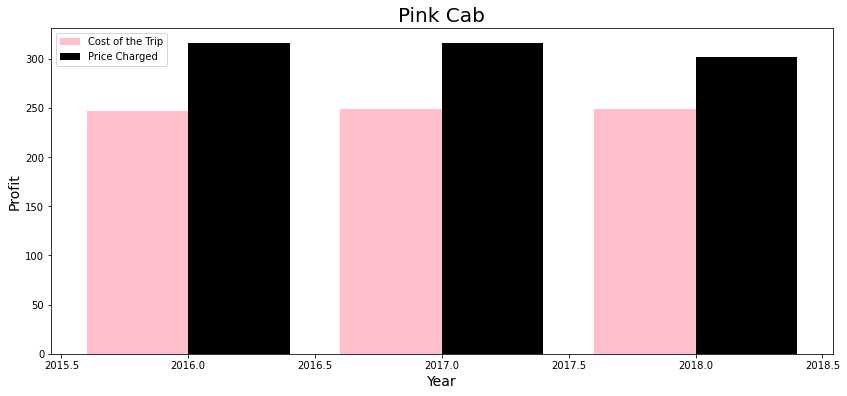

In [41]:
plot1 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='pink', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='black', align='center',label='Price Charged')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

**Yellow Cab**

In [79]:
Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()

Year
2016    468.230462
2017    466.278438
2018    440.893159
Name: Price_Charged, dtype: float64

In [80]:
Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    298.536761
2017    297.861544
2018    297.442400
Name: Cost_of_Trip, dtype: float64

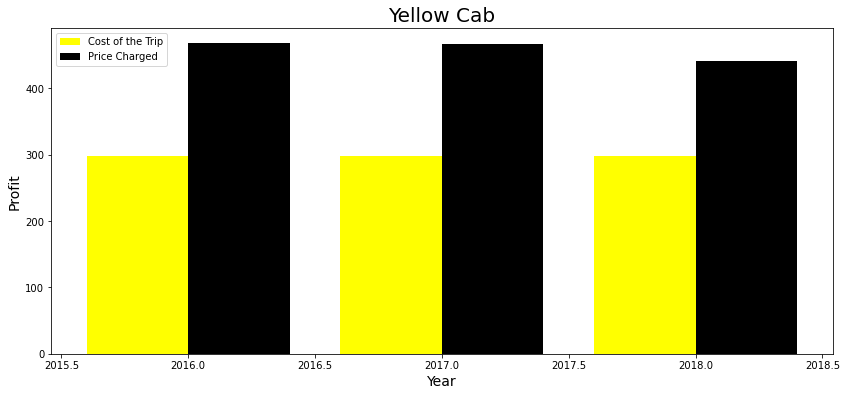

In [42]:
plot1 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='yellow', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='black', align='center',label='Price Charged')
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

>**The Yellow cab has a higher Profit Margin (Price Charged - Cost of Trip) compared to Pink cab**

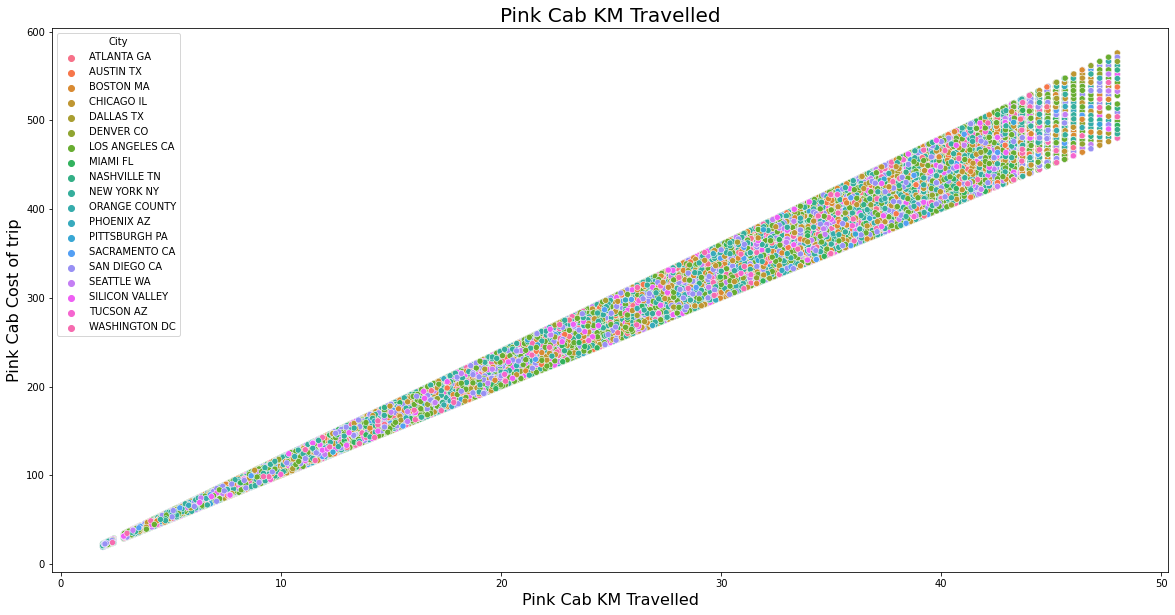

In [83]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=PinkCab["KM_Travelled"], y=PinkCab['Cost_of_Trip'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Cost of trip',fontsize = 16)
plt.xlabel('Pink Cab KM Travelled',fontsize = 16)
plt.show()

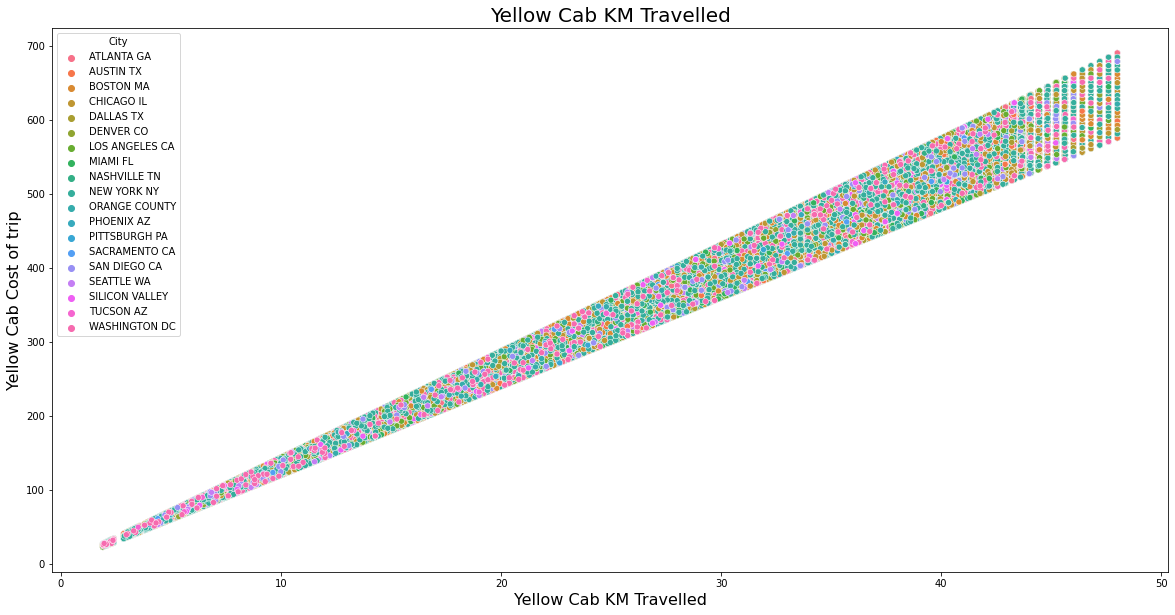

In [84]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=YellowCab["KM_Travelled"], y=YellowCab['Cost_of_Trip'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Cost of trip',fontsize = 16)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 16)
plt.show()

> **From the graph we see that the cost of trip for both Pink and Yellow cab are almost the same.**

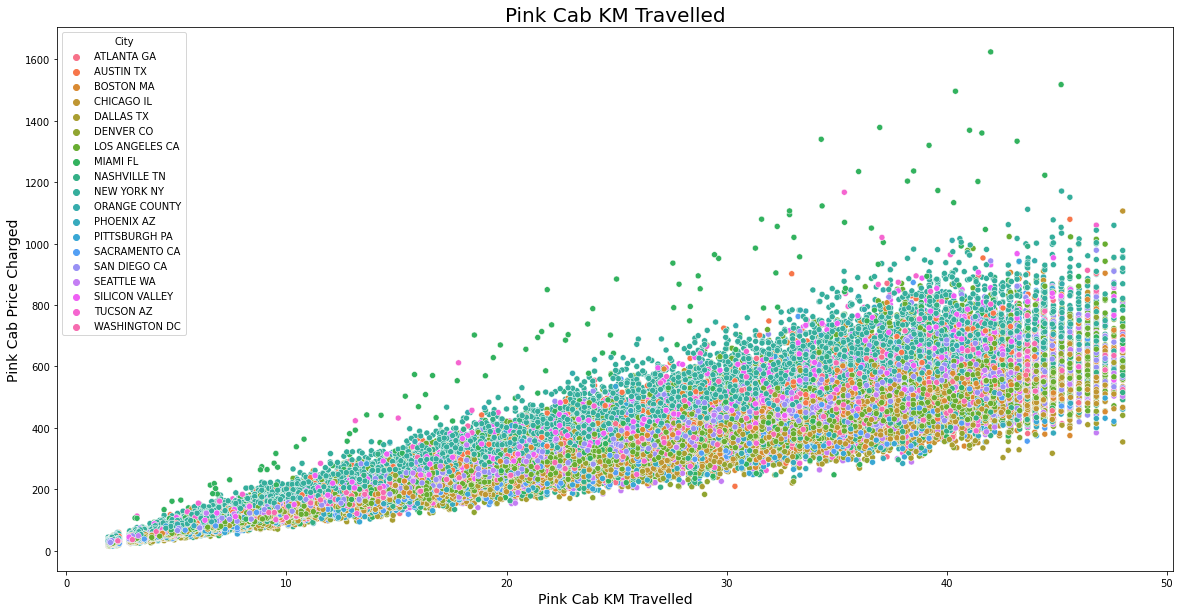

In [85]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=PinkCab["KM_Travelled"], y=PinkCab['Price_Charged'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Price Charged',fontsize = 14)
plt.xlabel('Pink Cab KM Travelled',fontsize = 14)
plt.show()

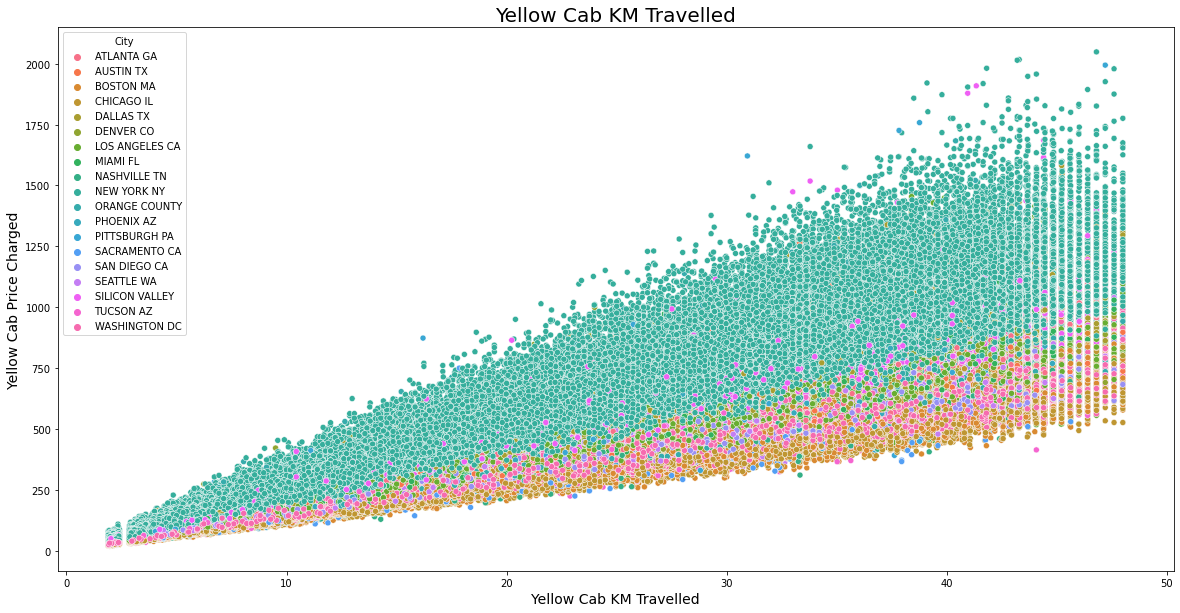

In [86]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=YellowCab["KM_Travelled"], y=YellowCab['Price_Charged'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Price Charged',fontsize = 14)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 14)
plt.show()

> * From the graphs we see that for New York City the Yellow Cab price charged is more in comparison to the other cities. 
> * and for Pink cab all the cities have the same increase in prices with increase in distance 
> * the outliers exist in both the graphs  which may be due to high end cars or weather.

## Creating Master Data

#### Add , join the Transaction_ID to Cab_Data

In [50]:
left = Cab_Data.set_index(['Transaction_ID'])
right = Transaction_ID.set_index(['Transaction_ID'])
data = left.join(right)
data.head()

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,29290,Card
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,27703,Card
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,28712,Cash
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,28020,Cash
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,27182,Card


#### Add , join Customer_ID to Data

In [51]:
left = data.set_index([data.index,'Customer_ID'])
right = Customer_ID.set_index(['Customer_ID'])
data = left.join(right)
data.head()

,,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,
10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,Card,Male,28,10813
10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,Card,Male,27,9237
10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,Cash,Male,53,11242
10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,Cash,Male,23,23327
10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,Card,Male,33,8536


#### Add , join the City to Cab_Data

In [52]:
left = data.set_index([data.index,'City'])
right = City.set_index(['City'])
data = left.join(right)
data.head()

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,1,2016,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,1,2016,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,1,2016,Card,Male,33,8536,"814,885","24,701"


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   KM_Travelled        359392 non-null  float64
 2   Price_Charged       359392 non-null  float64
 3   Cost_of_Trip        359392 non-null  float64
 4   Month               359392 non-null  int64  
 5   Year                359392 non-null  int64  
 6   Payment_Mode        359392 non-null  object 
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income_(USD/Month)  359392 non-null  int64  
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 48.2+ MB


In [54]:
data = data.reset_index()
data = data.rename(columns={'Income_(USD/Month)':'Income'})
city_users = data.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

In [55]:
city_y = data[data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_y

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

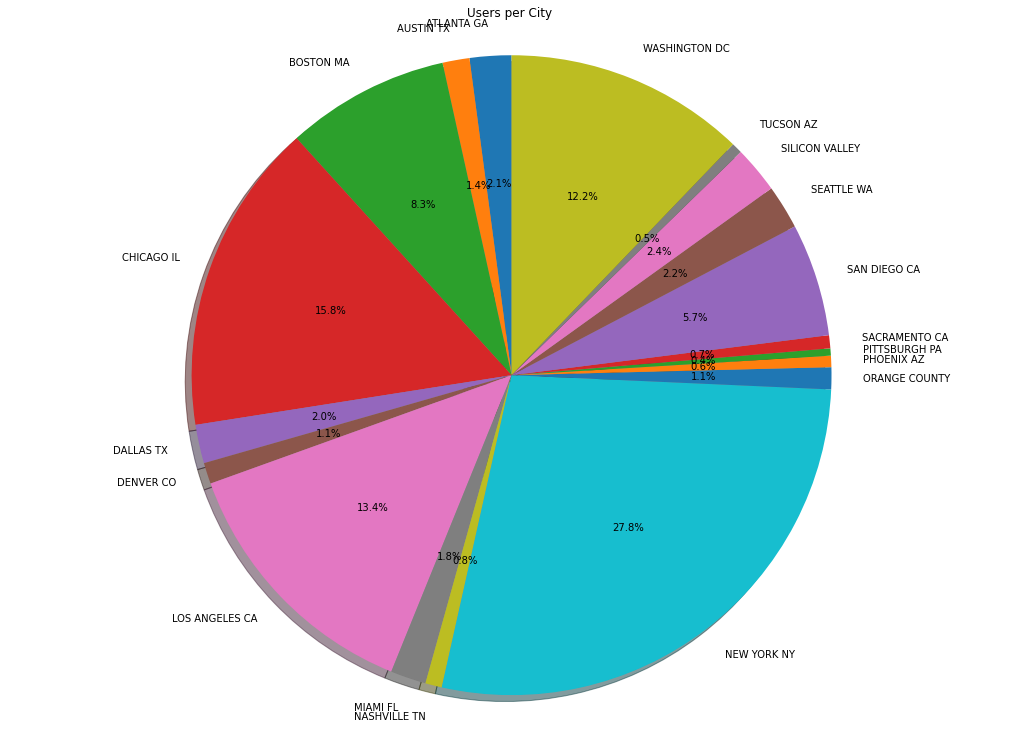

In [58]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

> **New York City has the highest Cab users with 28% followed by Chicago with 16% and Los Angeles with 13%**

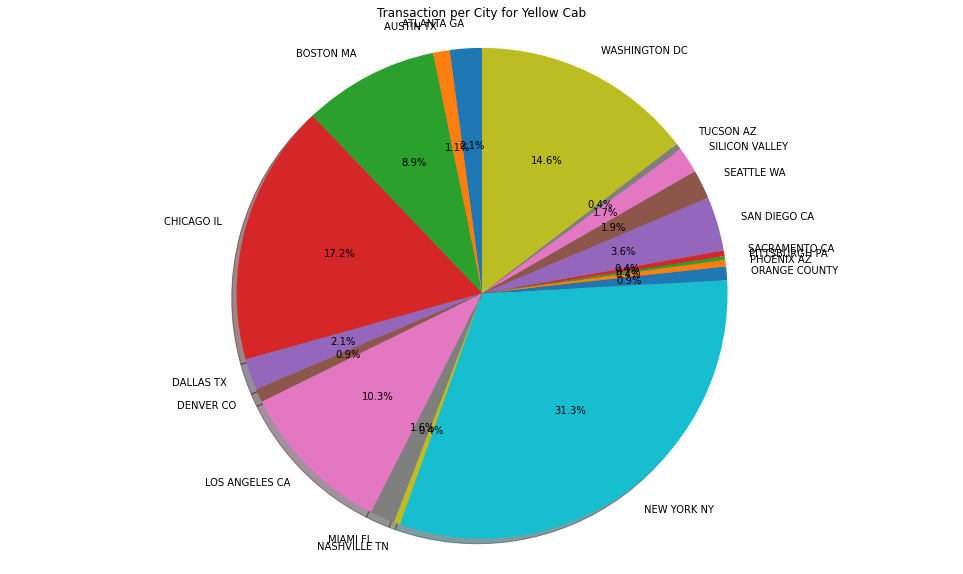

In [59]:
labs = city_y.index
vals = city_y.values
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()

In [60]:
city_p = data[data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_p

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

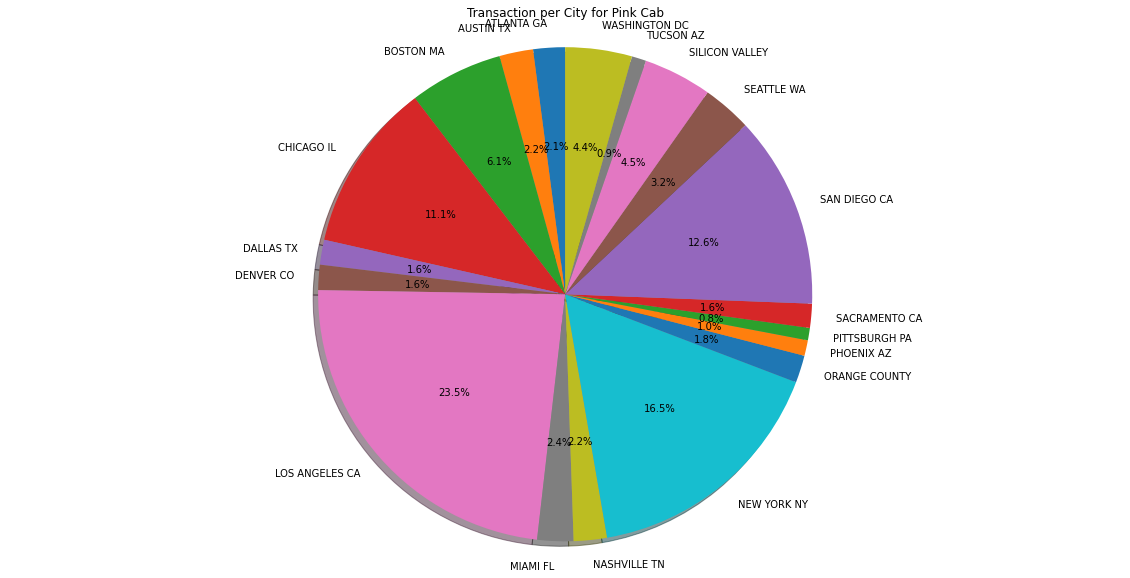

In [61]:
labs = city_p.index
vals = city_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

>**Transaction for Yellow Cab is highest in New York City which has the highest Cab Users of 28%**

>**Transaction for Pink Cab is highest in Los Angeles City**

In [62]:
gender_y=data[data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_y

Gender
Female    454.571538
Male      460.821326
Name: Price_Charged, dtype: float64

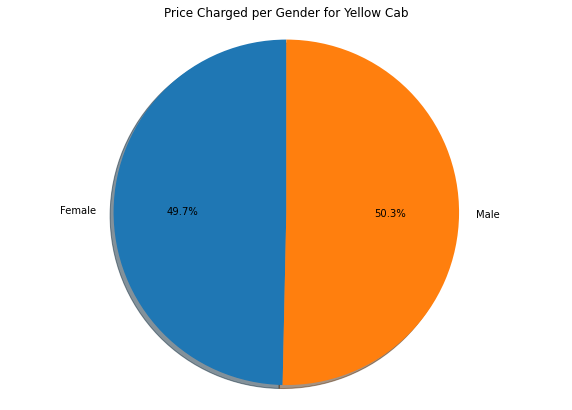

In [63]:
labs = gender_y.index
vals = gender_y.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()

In [64]:
gender_p=data[data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()
gender_p

Gender
Female    310.624823
Male      310.940547
Name: Price_Charged, dtype: float64

>**Yellow Cab charge less from Female Customers whereas Pink Cab charges same for both Male and Female Customers.**

In [65]:
gender_cab=data.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

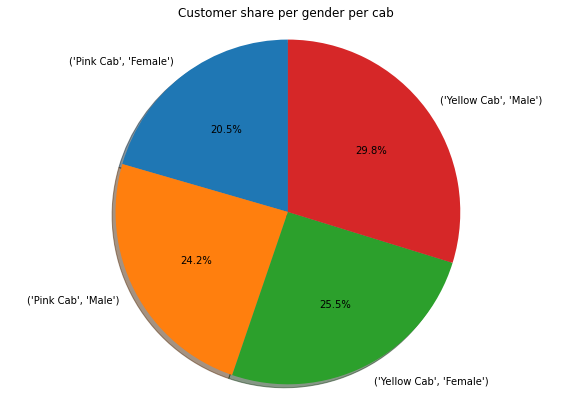

In [66]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

>**Female Customers in Yellow Cab is higher compared to Male customers**

In [67]:
data['Margins'] = (data['Price_Charged']-data['Cost_of_Trip'])
data.head()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Population,Users,Margins
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,1,2016,Card,Male,28,10813,"814,885","24,701",57.315
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,1,2016,Card,Male,27,9237,"814,885","24,701",23.666
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,"814,885","24,701",27.568
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,"814,885","24,701",25.798
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,1,2016,Card,Male,33,8536,"814,885","24,701",16.844


In [68]:
data.tail()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Population,Users,Margins
359387,10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651,"418,859","127,001",5.8800
359388,10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528,"418,859","127,001",6.9020
359389,10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966,"418,859","127,001",87.4200
359390,10440106,52175,WASHINGTON DC,Yellow Cab,8.80,146.19,114.0480,1,2018,Card,Male,32,6423,"418,859","127,001",32.1420
359391,10440107,52917,WASHINGTON DC,Yellow Cab,12.76,191.58,177.6192,1,2018,Card,Male,20,11284,"418,859","127,001",13.9608


In [69]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margins']]
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income,Margins
KM_Travelled,1.000000,0.835753,0.981848,-0.001773,-0.001094,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.059639,-0.036903,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.008309,-0.001766,-0.000189,-0.000633,0.486056
Month,-0.001773,-0.059639,-0.008309,1.000000,-0.033169,-0.002376,0.000585,-0.093886
Year,-0.001094,-0.036903,-0.001766,-0.033169,1.000000,-0.000497,-0.001679,-0.061420
Age,-0.000369,-0.003084,-0.000189,-0.002376,-0.000497,1.000000,0.003907,-0.005093
Income,-0.000544,0.003228,-0.000633,0.000585,-0.001679,0.003907,1.000000,0.006148
Margins,0.462768,0.864154,0.486056,-0.093886,-0.061420,-0.005093,0.006148,1.000000


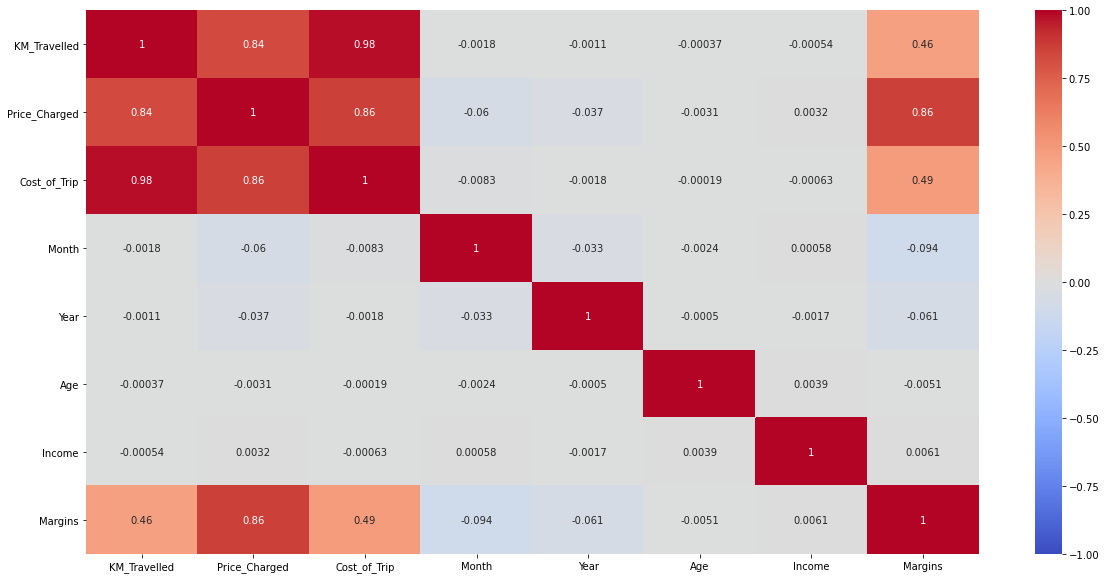

In [71]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

>**There is a correlation between Margin & Price_Charged**

In [72]:
city_m = data[data.Month==12].groupby('City').Margins.mean()
city_m

City
ATLANTA GA         96.252930
AUSTIN TX          91.891400
BOSTON MA          62.360750
CHICAGO IL         52.396687
DALLAS TX         109.465216
DENVER CO         111.138893
LOS ANGELES CA     81.752667
MIAMI FL          100.150911
NASHVILLE TN       81.459593
NEW YORK NY       258.421581
ORANGE COUNTY      76.134553
PHOENIX AZ         76.922806
PITTSBURGH PA      57.105846
SACRAMENTO CA      27.119039
SAN DIEGO CA       70.382592
SEATTLE WA         76.515311
SILICON VALLEY    167.087114
TUCSON AZ          84.105100
WASHINGTON DC      62.742899
Name: Margins, dtype: float64

In [73]:
dt1 = data[(data.Company=='Pink Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dt2 = data[(data.Company=='Yellow Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dd1 = pd.DataFrame({'Margins_pink':dt1.values,'Transactions_pink':data[data.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
dd2 = pd.DataFrame({'Margins_yellow':dt2.values,'Transactions_yellow':data[data.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

### **Monthly Margins of Pink Cab**

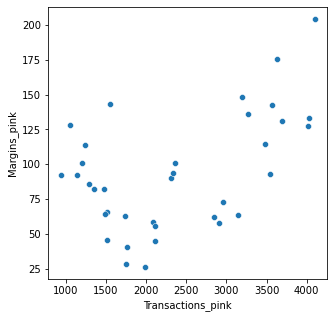

In [74]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transactions_pink,y=dd1.Margins_pink)
plt.show()

> Pink Cabs increase their margins with increase in number of Transactions

### Margins for Yellow cabs

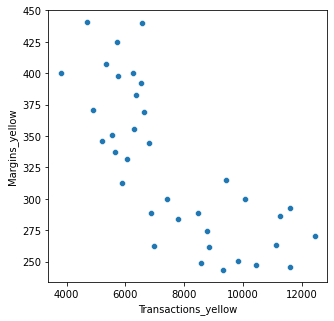

In [75]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_yellow,y=dd2.Margins_yellow)
plt.show()

>Yellow Cab decrease the Margin with the increase in Transaction

# Hypothesis Testing

### Null Hypothesis:Margin remain the same regarding Gender for both Yellow Cab & Pink Cab

In [76]:
a = data[(data.Gender=='Female')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494144e-25


>**Yellow Cab:** There is difference in Margin between Male and Female customers


**For Pink Cabs**

In [77]:
a = data[(data.Gender=='Female')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Gender=='Male')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.11515305900425798


>**Pink Cab:** There is no difference in Margin between Male and Female customers

In [78]:
#Margins per Age
data[data.Age<=50].groupby('Company').Margins.mean()
data[data.Age>50].groupby('Company').Margins.mean()

Company
Pink Cab       62.053044
Yellow Cab    155.855885
Name: Margins, dtype: float64

In [79]:
#Pink Cab
a = data[(data.Age<=50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

71228 13483
We accept null hypothesis that theres no difference
P value is  0.32817487547980695


In [80]:

#Yellow Cab
a = data[(data.Age<=50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)

231480 43201
We accept alternate hypothesis that theres a difference
P value is  6.494256817799368e-09


>**Yellow Cabs also gives discount to people older than 50**

>**Is there difference in margins for Card payer and Cash payers**

In [81]:
#Pink Cab
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept null hypothesis that theres no difference
P value is  0.7900465828793288


In [82]:
#Yellow Cab
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.2933060638298729


>**There is no difference in Margin regarding mode of Payment for both Yellow & Pink Cab**

In [83]:
data.head()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Population,Users,Margins
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,1,2016,Card,Male,28,10813,"814,885","24,701",57.315
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,1,2016,Card,Male,27,9237,"814,885","24,701",23.666
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,"814,885","24,701",27.568
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,"814,885","24,701",25.798
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,1,2016,Card,Male,33,8536,"814,885","24,701",16.844


In [84]:
data.to_csv('master_data.csv',index = False)